# SPEECH COMMAND RECOGNITION SYSTEM

# 1. Literature Survey

### Speech command recognition is an essential task in the field of audio processing and machine learning. Several methods have been developed to tackle this problem, ranging from traditional machine learning techniques to advanced deep learning models. Techniques such as Mel-Frequency Cepstral Coefficients (MFCC) for feature extraction and Convolutional Neural Networks (CNNs) for classification are widely used. Key datasets include Google's Speech Commands dataset, which provides a comprehensive set of labeled audio commands for training and evaluation.

# 2. Dataset Description

### For this project, we use a custom dataset stored in the Dataset directory. Each sub-folder within this directory represents a different command, containing multiple audio files of that command. The dataset is preprocessed to ensure consistency in audio length and to extract meaningful features using MFCC.                                                       

### Command / Keyword List
### We list the different commands available in the dataset to understand the variety of labels:

### >> Load the Necessary Libraries

In [1]:
import os
import numpy as np
import tensorflow as tf
import librosa
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
import seaborn as sns

ModuleNotFoundError: No module named 'librosa'

In [ ]:
# Path to the dataset directory
DATASET_PATH = "train/"

# List all commands (subdirectory names) in the dataset directory
commands = np.array(os.listdir(DATASET_PATH))
print('Commands:', commands)


Commands: ['bed' 'bird' 'cat' 'dog' 'down' 'eight' 'five' 'four' 'go' 'happy'
 'house' 'left' 'marvin' 'nine' 'no' 'off' 'on' 'one' 'right' 'seven'
 'sheila' 'six' 'stop' 'three' 'tree' 'two' 'up' 'wow' 'yes' 'zero']


# 3. Exploratory Data Analysis

### In this section, we load the dataset, explore its structure, and visualize some examples to understand the data better.

## >>Visualizing Audio Signals

### We visualize some audio signals and their corresponding labels to better understand the data.

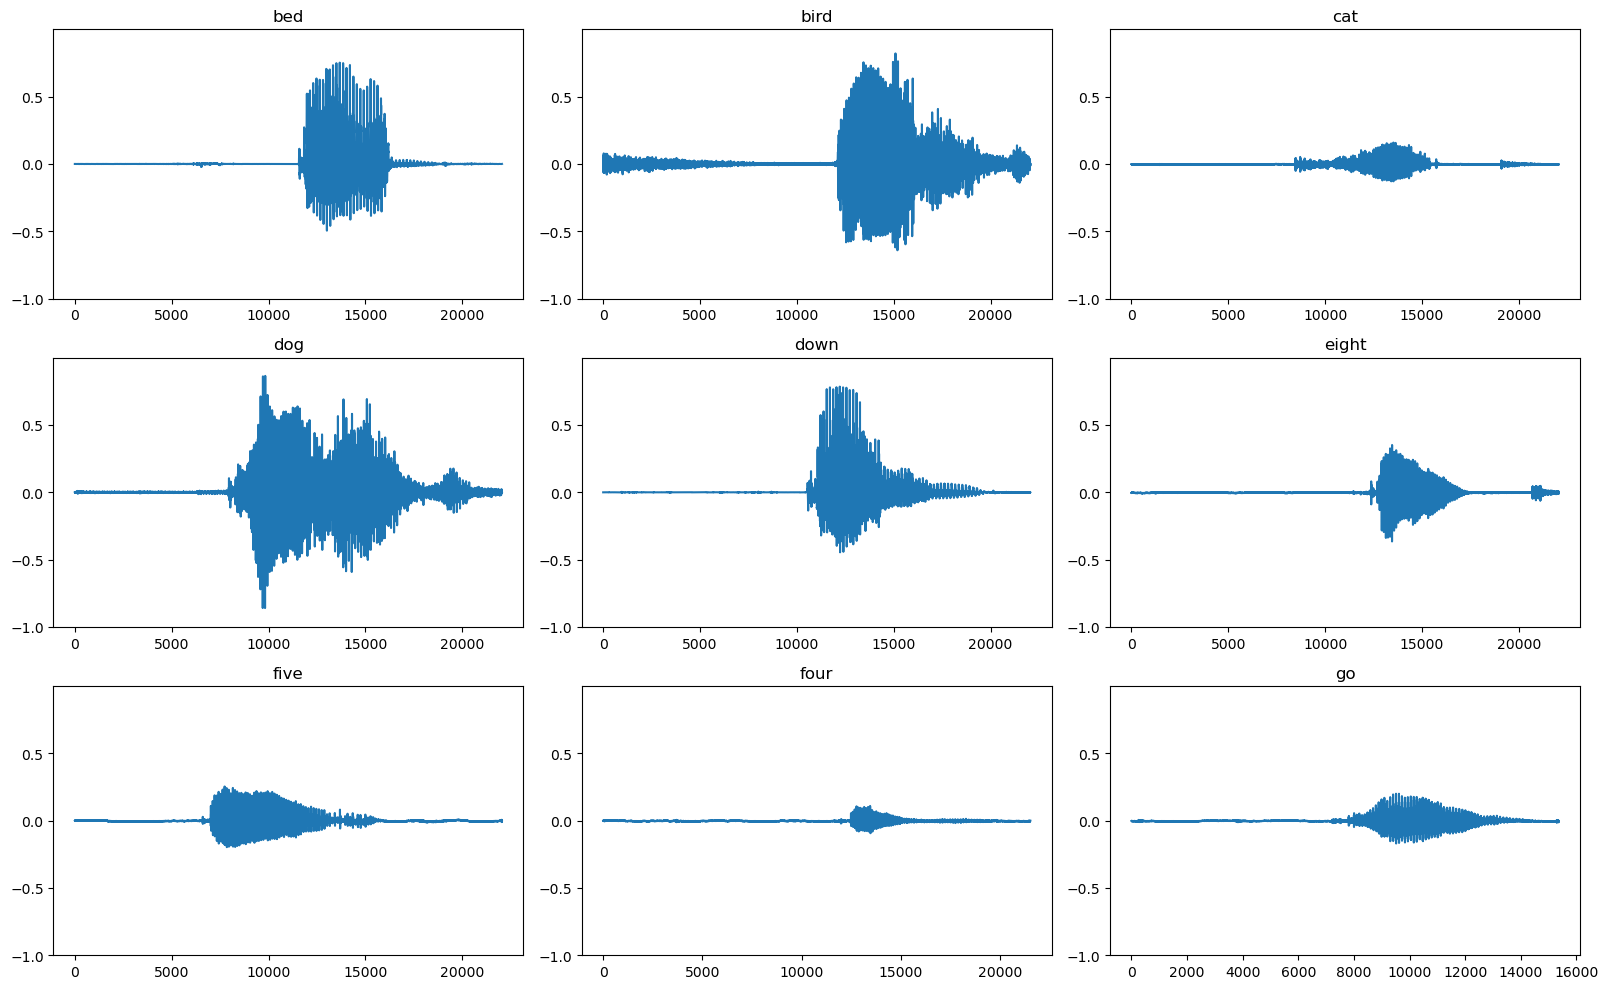

In [ ]:
# load only one file from each command
def load_data():
    data = []
    labels = []
    for i, command in enumerate(commands):
        # get the list of all files in the subdirectory
        files = os.listdir(DATASET_PATH + command)
        # load only the first file
        file = files[0]
        # load the audio file
        signal, sr = librosa.load(DATASET_PATH + command + '/' + file)
        data.append(signal)
        labels.append(i)
    return data, labels

# Load the data
data, labels = load_data()

# plot the data
plt.figure(figsize=(16, 10))
rows, cols = 3, 3
for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.title(commands[labels[i]])
    plt.plot(data[i])
    plt.yticks(np.arange(-1, 1, 0.5)) # set ticks at every 0.5
    plt.ylim(-1, 1) # set y-axis limits to -1 and 1
plt.tight_layout()
plt.show()


## >> Distribution of Commands

### First, let's visualize the distribution of audio files for each command in the dataset.

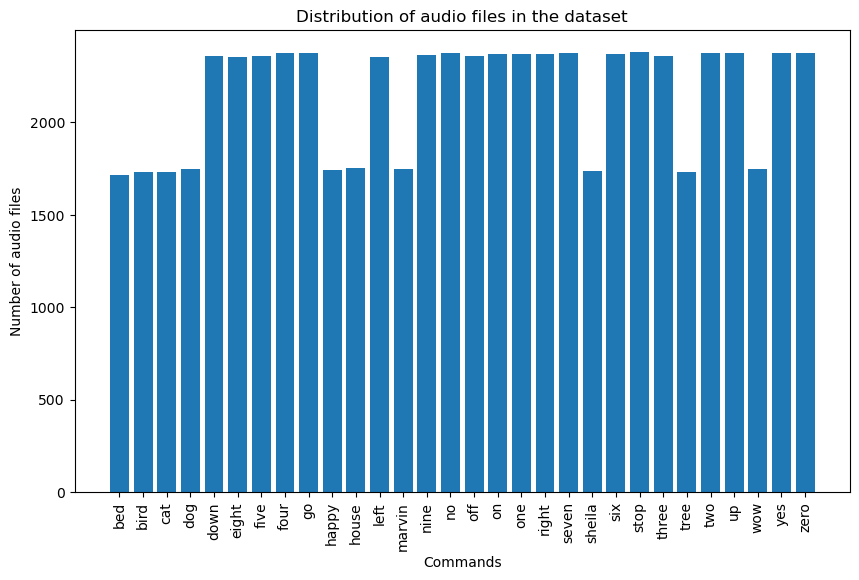

In [ ]:
# Plot the summary of the dataset -> total number of files for each command
num_samples = []
for command in commands:
    num_samples.append(len(os.listdir(DATASET_PATH + command)))
    
plt.figure(figsize=(10, 6))
plt.bar(commands, num_samples)
plt.xlabel('Commands')
plt.ylabel('Number of audio files')
plt.title('Distribution of audio files in the dataset')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for vertical alignment
plt.show()


## >>Visualizing Audio Signals
### Here we extract the different features in audio signal
<ul>
<li> 01. power spectrum (FFT)</li>
<li> 02. spectrum (STFT)</li>
<li> 03. mfccs (mel-frequency cepstral coefficients) </li>

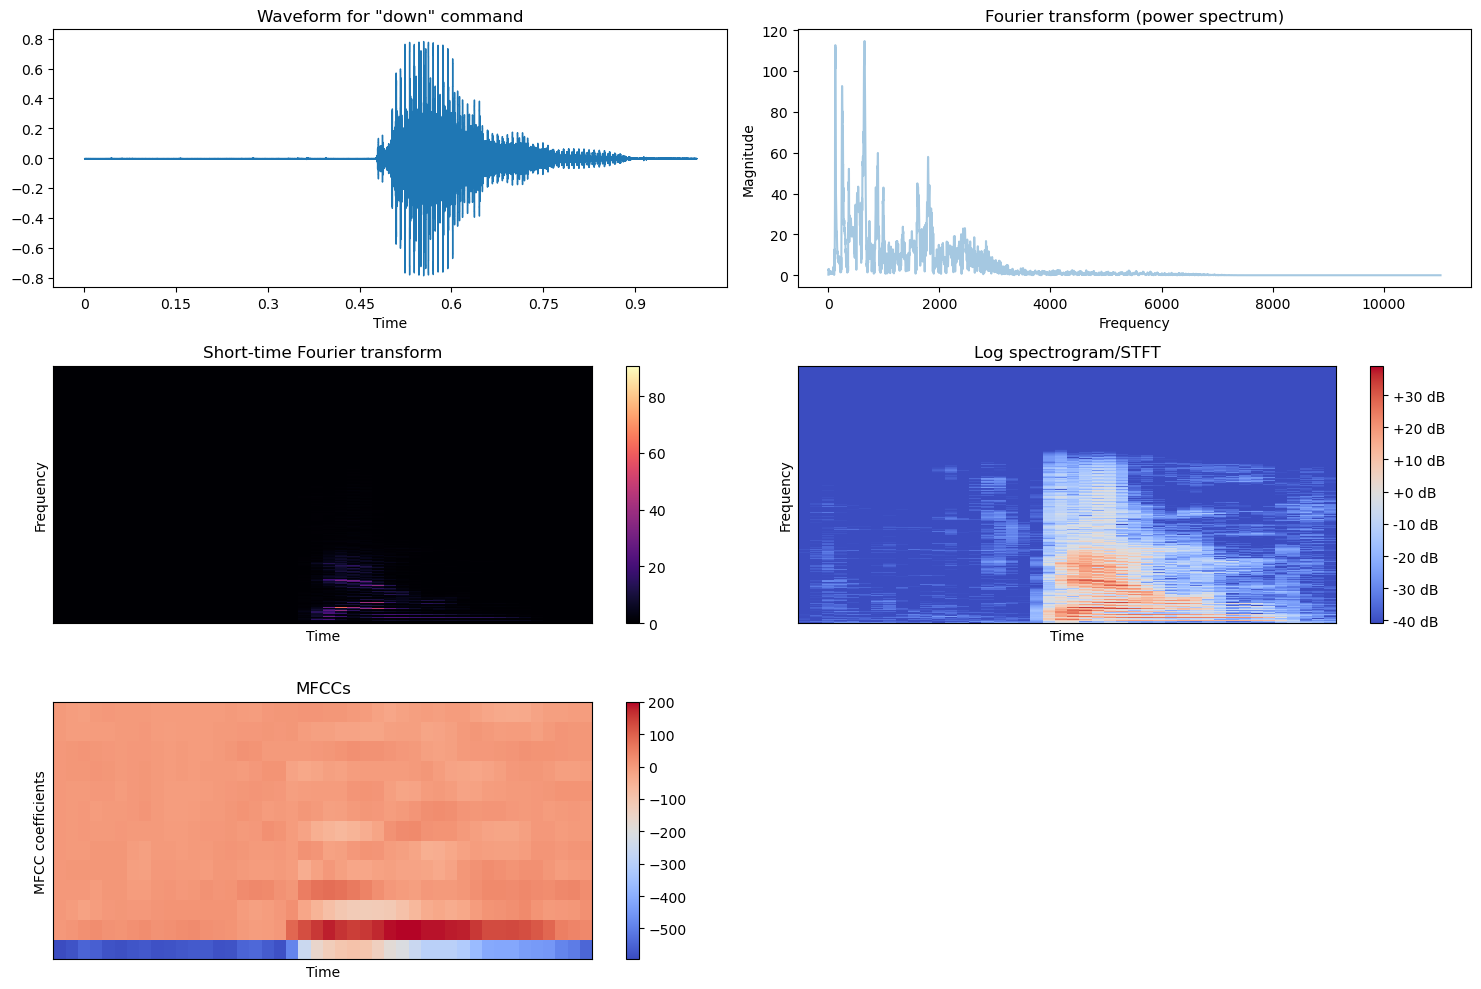

In [ ]:
def extract_features(command):
    # load a single audio file from command
    files = os.listdir(DATASET_PATH + command)
    file = files[0]
    down_command_signal, down_command_sr = librosa.load(DATASET_PATH + 'down/' + file)

    plt.figure(figsize=(15, 10))

    # plot the waveform
    plt.subplot(3, 2, 1)
    librosa.display.waveshow(down_command_signal, sr=down_command_sr)
    plt.title('Waveform for "down" command')

    # perform fourier transform
    down_command_fft = np.fft.fft(down_command_signal)

    # calculate the abs values of the complex numbers to get the magnitude
    down_command_magnitude = np.abs(down_command_fft)

    # create the frequency variable
    frequencies = np.linspace(0, down_command_sr, len(down_command_magnitude))

    # take half of the spectrum and frequency
    left_frequencies = frequencies[:int(len(frequencies) / 2)]
    left_magnitudes = down_command_magnitude[:int(len(frequencies) / 2)]

    # plot the power spectrogram -> FFT
    plt.subplot(3, 2, 2)
    plt.plot(left_frequencies, left_magnitudes, alpha=0.4) # alpha is for transparency
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.title('Fourier transform (power spectrum)')

    # perform the short-time Fourier transform
    down_command_stft = librosa.stft(down_command_signal, n_fft=2048, hop_length=512) 
                                            # n_fft is the window size, hop_length is the number of samples
                                            # between the start of consecutive frames
                                            
    down_command_magnitude = np.abs(down_command_stft)

    # display the spectrogram
    plt.subplot(3, 2, 3)
    librosa.display.specshow(down_command_magnitude, sr=down_command_sr,hop_length=512)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.colorbar()
    plt.title('Short-time Fourier transform')

    #apply logarithmic compression to the amplitude (in dB)
    down_command_log_power = librosa.amplitude_to_db(down_command_magnitude)

    # display the log spectrogram
    plt.subplot(3, 2, 4)
    librosa.display.specshow(down_command_log_power, sr=down_command_sr,hop_length=512)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log spectrogram/STFT')

    # extract the MFCCs
    down_command_mfccs = librosa.feature.mfcc(y=down_command_signal,sr=down_command_sr, n_mfcc=13, n_fft=2048, hop_length=512)

    # display the MFCCs
    plt.subplot(3, 2, 5)
    librosa.display.specshow(down_command_mfccs, sr=down_command_sr, hop_length=512)
    plt.xlabel('Time')
    plt.ylabel('MFCC coefficients')
    plt.colorbar()
    plt.title('MFCCs')

    # show the plots
    plt.tight_layout()
    plt.show()
    
# extract features for the "down" command
extract_features('down')


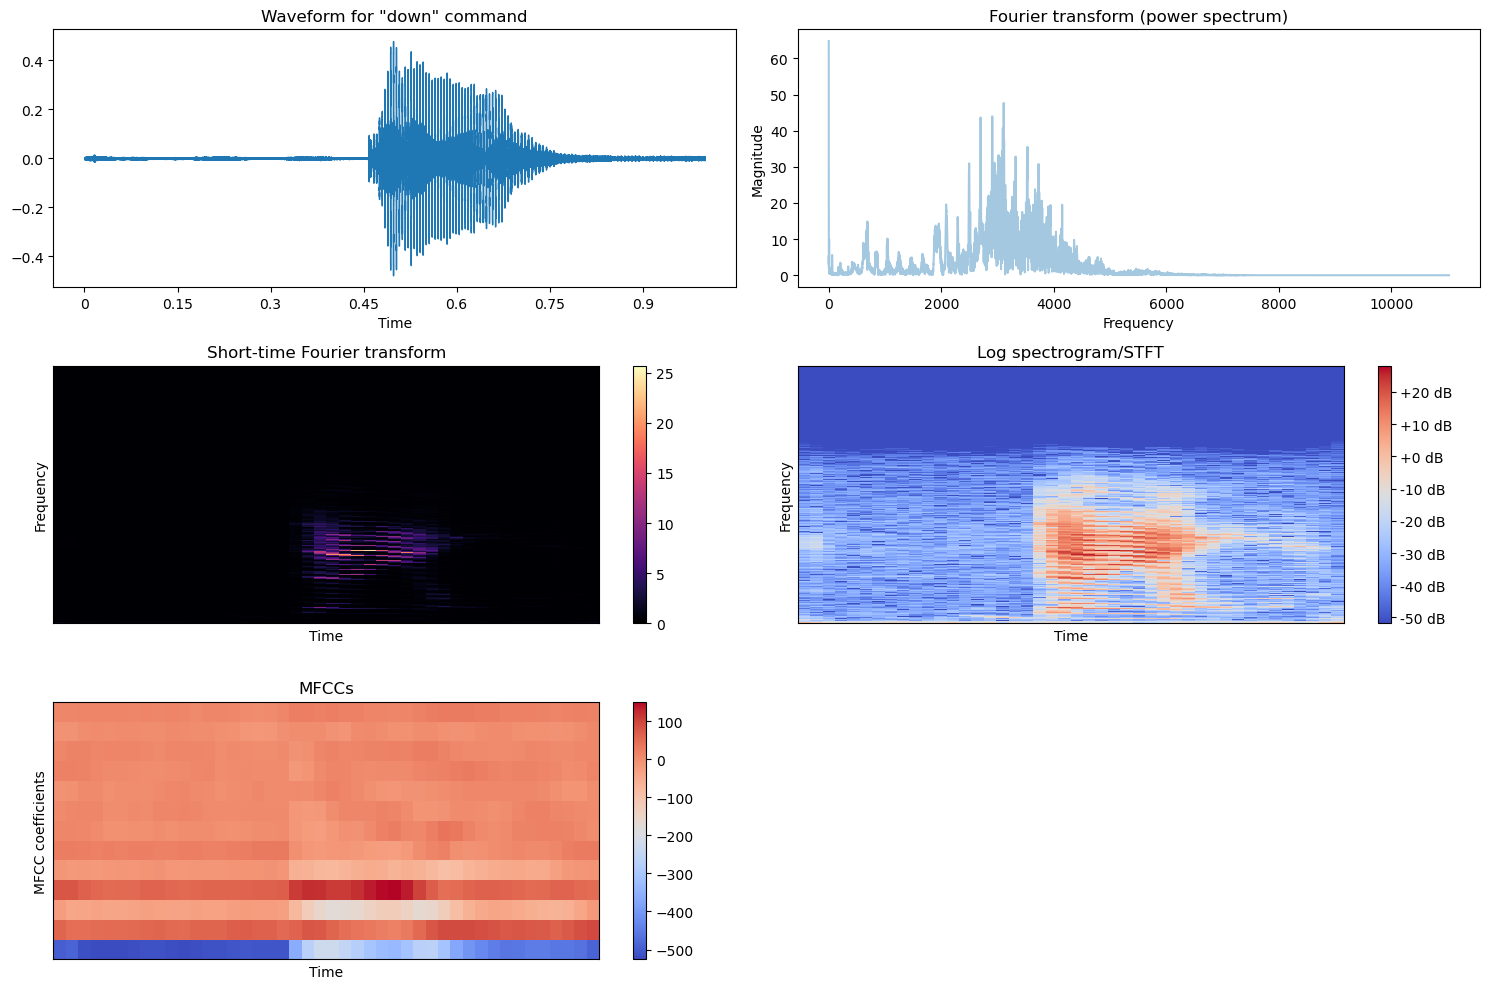

In [ ]:
# Extract features for 'on' command
extract_features('on')

Explanation:

1. Distribution of Commands:

The first part of the code plots the distribution of audio files across different commands in the dataset. This helps in understanding the balance of the dataset and identifying any potential imbalance issues.

2. Waveform :

The second part of the code visualizes the waveform and MFCCs of a sample audio file. This helps in understanding the audio signal and the features we are extracting for model training.

3. Power Spectrum

4. STFT Spectrum & Spectrum in log Scale

5. MFCC plot


# 4. Data Preprocessing

### We preprocess the dataset by extracting MFCC features from each audio file and saving them to a JSON file.

In [ ]:
JSON_PATH = "data.json"
SAMPLES_TO_CONSIDER = 22050  # default sample size for audio files which is 1 sec

def preprocess_dataset(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512):
    """Extracts MFCCs from music dataset and saves them into a json file.
    
    :param dataset_path (str): Path to dataset
    :param json_path (str): Path to json file used to save MFCCs
    :param num_mfcc (int): Number of coefficients to extract
    :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
    :param hop_length (int): Sliding window for FFT. Measured in # of samples
    """
    
    # dictionary to store mapping, labels, MFCCs and file names
    data = {
        "mapping": [],
        "labels": [],
        "MFCCs": [],
        "files": []
    }

    # loop through all sub-dirs
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        
        # ensure we're not at the root level
        if dirpath != dataset_path:
            
            # save the label in the mapping
            label = dirpath.split("/")[-1]
            data["mapping"].append(label)
            print("\nProcessing: '{}'".format(label))

            # process all audio files in the sub-dir and store MFCCs
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                # load audio file
                signal, sample_rate = librosa.load(file_path)

                # ensure the audio file is at least 1 sec
                if len(signal) >= SAMPLES_TO_CONSIDER:
                    # slice the signal to have consistent length for all segments
                    signal = signal[:SAMPLES_TO_CONSIDER]
                    
                    # extract MFCCs
                    MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    
                    # store data for analysed track
                    data["MFCCs"].append(MFCCs.T.tolist()) # transpose MFCC data because the shape is (n_mfcc, n_frames)
                                                        # and we want to have (n_frames, n_mfcc) to feed the data to the model
                    data["labels"].append(i-1)
                    data["files"].append(file_path)
                    print("{}: {}".format(file_path, i-1))

    # save data in json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4) # indent is for pretty print

# Preprocess the dataset      
preprocess_dataset(DATASET_PATH, JSON_PATH)



Processing: 'bed'
train/bed\00176480_nohash_0.wav: 0
train/bed\004ae714_nohash_0.wav: 0
train/bed\00f0204f_nohash_0.wav: 0
train/bed\00f0204f_nohash_1.wav: 0
train/bed\012c8314_nohash_0.wav: 0
train/bed\012c8314_nohash_1.wav: 0
train/bed\0132a06d_nohash_0.wav: 0
train/bed\0135f3f2_nohash_0.wav: 0
train/bed\0137b3f4_nohash_0.wav: 0
train/bed\01648c51_nohash_0.wav: 0
train/bed\01648c51_nohash_1.wav: 0
train/bed\016e2c6d_nohash_0.wav: 0
train/bed\01b4757a_nohash_0.wav: 0
train/bed\01bcfc0c_nohash_0.wav: 0
train/bed\026290a7_nohash_0.wav: 0
train/bed\02746d24_nohash_0.wav: 0
train/bed\035de8fe_nohash_0.wav: 0
train/bed\0362539c_nohash_0.wav: 0
train/bed\037c445a_nohash_0.wav: 0
train/bed\0397ecda_nohash_0.wav: 0
train/bed\03c96658_nohash_0.wav: 0
train/bed\042186b8_nohash_0.wav: 0
train/bed\042ea76c_nohash_0.wav: 0
train/bed\0447d7c1_nohash_0.wav: 0
train/bed\0474c92a_nohash_1.wav: 0
train/bed\05b2db80_nohash_0.wav: 0
train/bed\05d18852_nohash_0.wav: 0
train/bed\06076b6b_nohash_0.wav: 0
t

# 5. Model Implementation

### We build and train a Convolutional Neural Network (CNN) for the speech command recognition task.

## >> Preparing the Dataset

In [ ]:
# load data from json file
def load_data(data_path):
    with open(data_path, "r") as fp:
        data = json.load(fp)
    X = np.array(data["MFCCs"])
    y = np.array(data["labels"])
    print("Training sets loaded!")
    return X, y

# divide the dataset into training, validation and testing sets
def prepare_dataset(data_path, test_size=0.2, validation_size=0.2):
    X, y = load_data(data_path)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)
    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    return X_train, y_train, X_validation, y_validation, X_test, y_test


## >> Building the Model

In [ ]:
def build_model(input_shape, loss="sparse_categorical_crossentropy", learning_rate=0.0001):
    
    model = tf.keras.models.Sequential()

    # 1st conv layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape,
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))

    # 2nd conv layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))

    # 3rd conv layer
    model.add(tf.keras.layers.Conv2D(32, (2, 2), activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

    # Flatten output and feed into dense layer
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))

    # Softmax output layer
    num_classes = commands.shape[0]
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    optimiser = tf.optimizers.Adam(learning_rate=learning_rate)

    # Compile model
    model.compile(optimizer=optimiser, loss=loss, metrics=["accuracy"])

    # Print model parameters on console
    model.summary()

    return model

## >> Training the Model

In [ ]:
JSON_PATH = "data.json"
EPOCHS = 50
BATCH_SIZE = 32
PATIENCE = 5
LEARNING_RATE = 0.0001

# create train, validation and test sets
X_train, y_train, X_validation, y_validation, X_test, y_test = prepare_dataset(JSON_PATH)

# build the CNN model
input_shape = (X_train.shape[1], X_train.shape[2], 1)
model = build_model(input_shape, learning_rate=LEARNING_RATE)

# train the model
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", min_delta=0.001, patience=PATIENCE)
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_validation, y_validation), callbacks=[earlystop_callback])


Training sets loaded!
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 42, 11, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 42, 11, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 6, 64)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 4, 32)         18464     
                                                                 
 batch_normalization_1 (Batc  (None, 19, 4, 32)        128       
 hNormalization)                                                 
                                  

In [ ]:
# save the model
SAVE_MODEL_PATH="model.h5"
model.save(SAVE_MODEL_PATH)

## >> Process of Model Training

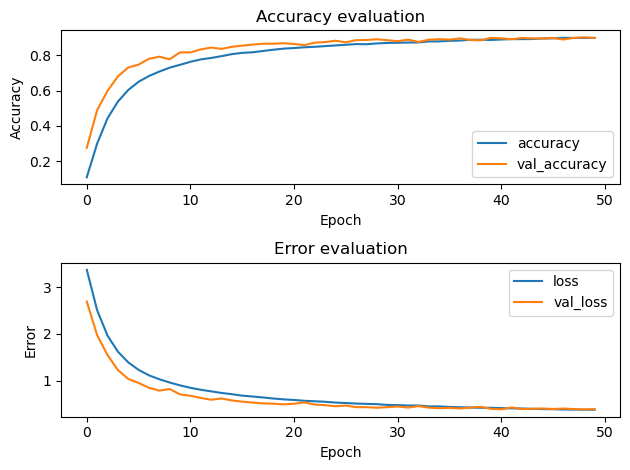

In [ ]:
# plot the history of the training
plt.subplot(2,1,1)
# create accuracy sublpot
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.title("Accuracy evaluation")

# create error sublpot
plt.subplot(2,1,2)
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend(loc="upper right")
plt.title("Error evaluation")

plt.tight_layout()
plt.show()

# 6. Model Evaluation and Discussion

## >> Evaluating the Model

In [ ]:
# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


365/365 [==============================] - 1s 4ms/step - loss: 0.3998 - accuracy: 0.9029
Test loss: 0.39980950951576233
Test accuracy: 0.9029268026351929


## >> Displaying a Confusion Matrix

In [ ]:
# get the label_names from json file
def get_labels(json_path):
    with open(json_path, "r") as fp:
        data = json.load(fp)
    labels = data["mapping"]
    return labels

# get the labels
label_names = get_labels(JSON_PATH)

365/365 [==============================] - 1s 3ms/step


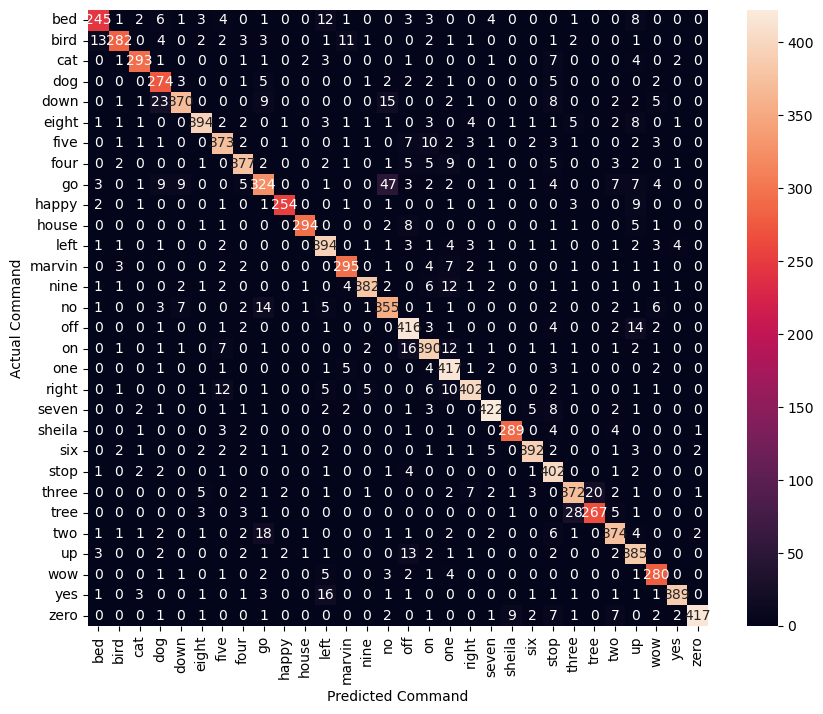

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred = tf.argmax(y_pred, axis=1)

# Actual labels
y_true = y_test

# Compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=label_names, yticklabels=label_names, annot=True, fmt='g')
plt.xlabel('Predicted Command')
plt.ylabel('Actual Command')
plt.show()
